# Class 6: Array computations continued and introduction to pandas

Today we will continue discussing array computations and how it can be applied processing images. If there is time, we will begin to discuss pandas Series and DataFrames.

## Notes on the class Jupyter setup

If you have the *ydata123_2024a* environment set up correctly, you can get the class code using the code below (which presumably you've already done given that you are seeing this notebook).  

In [44]:
import YData

# YData.download.download_class_code(6)   # get class code    

# YData.download.download_class_code(6, True)  # get the code with the answers 

There are also similar functions to download the homework:

In [45]:
# YData.download.download_homework(2)  # downloads the second homework 

If you are using colabs, you should run the code below to load the YData package.

In [46]:
# !pip install https://github.com/emeyers/YData_package/tarball/master

If you are using google colabs, you should also uncomment and run the code below to mount the your google drive

In [47]:
# from google.colab import drive
# drive.mount('/content/drive')

## Very quick review of numpy

Let's very quickly review a few key functions of numpy by taking a number journey...


In [48]:
# import the numpy package
import numpy as np

import matplotlib.pyplot as plt


**Step 1:** Create an ndarray called `my_array` that has the numbers: 12, 4, 6, 3, 4, 3, 7, 4

In [49]:

my_array = np.array([12, 4, 6, 3, 4, 3, 7, 4])

my_array

array([12,  4,  6,  3,  4,  3,  7,  4])

**Step 2:** Create an array `my_array2` that consists of the values of `my_array` minus the mean value of `my_array`. 


In [50]:

my_array2 = my_array - np.mean(my_array)

my_array2

array([ 6.625, -1.375,  0.625, -2.375, -1.375, -2.375,  1.625, -1.375])

**Step 3:** Create `my_array3` which is a boolean array that has `True` values for the positive values in `my_array2`


In [51]:

my_array3 = my_array2 > 0

my_array3


array([ True, False,  True, False, False, False,  True, False])

**Step 4:** Calculate and print the total number of `True` values in `my_array3`


In [52]:

np.sum(my_array3)


3

### What proportion of NBA players are centers? 

The data from the 2022-2023 season is loaded below and ndarrays for players positions and salaries are created. 

See if you can use this data to calculate the proportion of NBA players that are centers using numpy!

In [53]:
# download the data
import YData
YData.download.download_data("nba_salaries_2022_23.csv")

The file `nba_salaries_2022_23.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


In [54]:
# Load the NBA data as a pandas data frame
import pandas as pd
nba = pd.read_csv("nba_salaries_2022_23.csv")  # load in the data
nba.head()

# Extract ndarrays for salary and position 
salary_array = nba["SALARY"].values
position_array = nba["POSITION"].values
team_array = nba["TEAM"].values
player_array = nba["PLAYER"].values

print(salary_array[0:5])
print(position_array[0:5])


[ 9.835881  2.79264   3.53616   0.508891 23.5     ]
['SF' 'SF' 'SF' 'SG' 'PF']


In [55]:
# get the proportion of players that are centers
boolean_centers = position_array == "C"

print(np.sum(boolean_centers)/len(boolean_centers))

# equivalently we can use the np.mean() funciton 
np.mean(boolean_centers)

0.1948608137044968


0.1948608137044968

## Boolean indexing/masking

We can also use Boolean arrays to return values in another array. This is called "Boolean masking" or "Boolean indexing".


In [56]:
my_array = np.array([12, 4, 6, 3, 4, 3, 7, 4])
my_array < 5    

array([False,  True, False,  True,  True,  True, False,  True])

In [57]:
# Calculate the average salary of NBA centers

centers_salaries = salary_array[boolean_centers]
print(len(centers_salaries))

np.mean(centers_salaries)

91


7.282722109890111

In [58]:
# Do the other positions have higher average salaries compared to centers? 
# Calculate the average salary of all players who are not Centers

not_centers_salaries = salary_array[~boolean_centers]

np.mean(not_centers_salaries)


8.691021018617022

In [59]:
# What are the salaries for centers on the Celtics? 

# Get Boolean array of players who are centers on the Celtics
boolean_celtics = team_array == "Boston Celtics"
boolean_celtics_and_centers = boolean_celtics * boolean_centers

# print the number of players that are centers on the celtics
print(sum(boolean_celtics_and_centers))

# check who they are
print(player_array[boolean_celtics_and_centers])

# get their salaries
salary_array[boolean_celtics_and_centers]


6
['Mike Muscala' 'Robert Williams' 'Al Horford' 'Noah Vonleh'
 'Blake Griffin' 'Luke Kornet']


array([ 3.5     , 10.714287, 26.5     ,  1.160955,  2.905851,  2.133278])

## Higher dimensional arrays

In [60]:
my_matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
my_matrix

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [61]:
# slicing to get a submatrix 
my_matrix[0:2, 0:2]   # like array slicing, it does return a value at the end index

array([[1, 2],
       [4, 5]])

In [62]:
my_matrix2 = my_matrix.copy()  # copy the matrix
my_matrix2[0:2, 0:2] = 100  # set particular index values to 100

my_matrix2

array([[100, 100,   3],
       [100, 100,   6],
       [  7,   8,   9]])

In [63]:
# sum all the values
print(np.sum(my_matrix))

45


In [64]:
# sum down the rows 
np.sum(my_matrix, axis = 0)

array([12, 15, 18])

In [65]:
# sum across the columns
np.sum(my_matrix, axis = 1)

array([ 6, 15, 24])

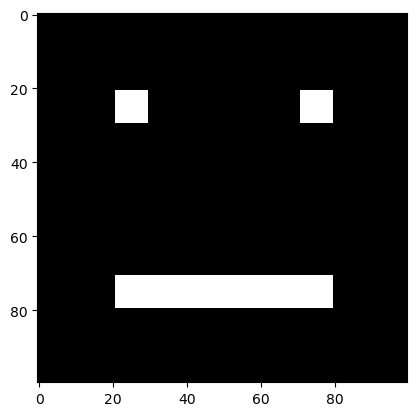

In [66]:
# what does the following do? 

face_array = np.zeros([100, 100])  # create a matrix of all 0's 

face_array[21:30, 21:30] = 1  # assign particular regions the value of 1
face_array[21:30, 71:80] = 1
face_array[71:80, 21:80] = 1

plt.imshow(face_array, cmap = 'gray');
#plt.colorbar();

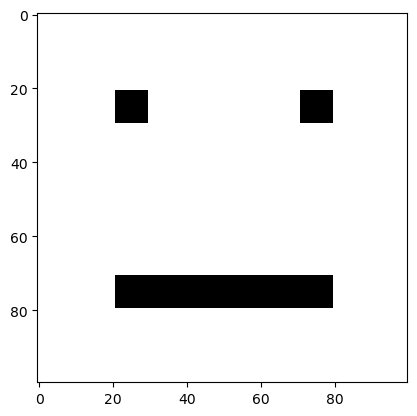

In [67]:
# convert face_array to a boolean matrix
face_array = face_array.astype("bool")
plt.imshow(~face_array, cmap = 'gray');

## Image processing

We can use numerical arrays (and NumPy) to do image processing. Let's explre this now.

In [68]:
# download an image of a famous Yale alumni
YData.download.download_image("burns.jpeg")

The file `burns.jpeg` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


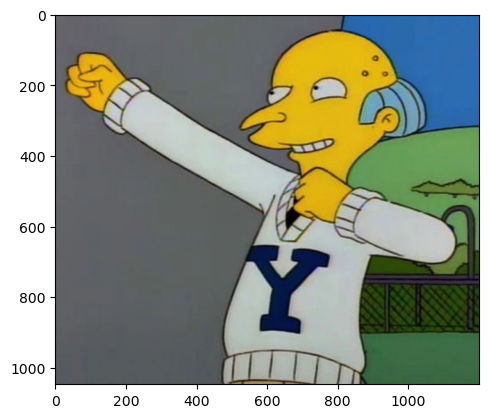

In [69]:
# load in an image 

from imageio.v3 import imread

I = imread("burns.jpeg")

plt.imshow(I);

In [70]:
# get the type and shape of the image
print(I.dtype)
I.shape

uint8


(1047, 1200, 3)

(1047, 1200, 3)
float64


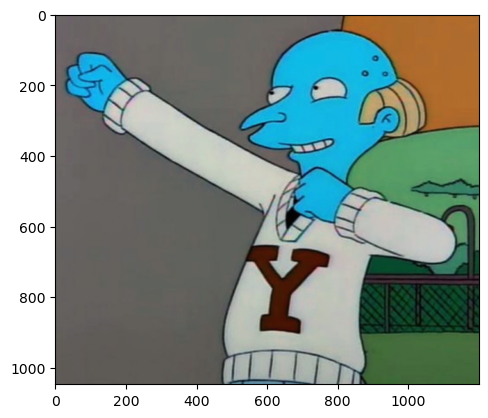

In [71]:
# Let's reverse the red and blue channels

# extract each color channel as a matrix
r_channel = I[:, :, 0]
g_channel = I[:, :, 1]
b_channel = I[:, :, 2]

# create new image where color channels will be swapped
rev_rb = np.zeros(I.shape)
print(rev_rb.shape)

# swap channels
rev_rb[:, :, 0] = b_channel
rev_rb[:, :, 1] = g_channel
rev_rb[:, :, 2] = r_channel

# convert to ints
print(rev_rb.dtype)
rev_rb = rev_rb.astype("int")

# display the image
plt.imshow(rev_rb);

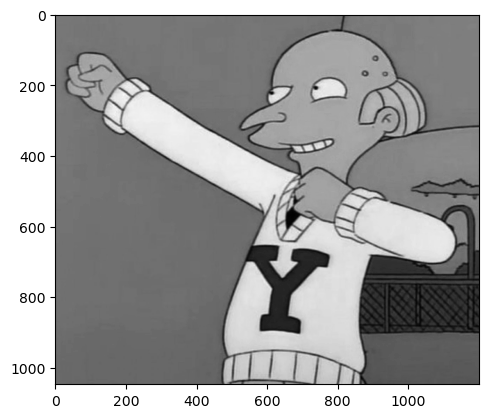

In [72]:
# To create a grayscale image - use the average value in all three r, g, b channels

mean_image = np.mean(I, axis = 2)

plt.imshow(mean_image, cmap='gray');

(1047, 1200, 3)


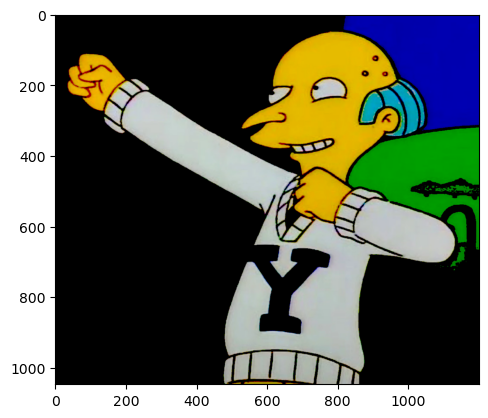

In [73]:
# Image masking - make all drak pixels even darker (set to a value of 0)

# copy the image and create a darkening mask
darken = I.copy()
darken_mask = darken < 128
print(darken_mask.shape)

# darken the pixels and display the image
darken[darken_mask] = 0
plt.imshow(darken);

## Tuples

Tuples are a basic data structure in Python that is like a list. However, unlike lists, elements in tuples are "immutable" meaning that once we create a tuple, we can not modify the values in the tuple.

We create tuples by using values in parentheses separated by commas:

`my_tuple = (10, 20, 30)`

Let's explore tuples now... 


In [74]:
my_tuple = (10, 20, 30)

my_tuple


(10, 20, 30)

In [75]:
# we can access elements of the tuple using square brackets (the same as lists)
my_tuple[1]

20

In [76]:
# unlike a list, we can't reassign values in a tuple 
my_tuple[1] = 50

TypeError: 'tuple' object does not support item assignment

In [77]:
# We extract values from tuples into regular names using "tuple unpacking"

val1, val2, val3 = my_tuple


val3

30

## Dictionaries

Dictionaries allow us to look up values. In particular, we provide a "key" and the dictionary return a "value". 

We can create dictionaries using the syntax: 

`my_dict = {"key1": 1, "key2": 20}`


In [78]:
my_dict = {"key1": 1, "key2": 20}
my_dict

{'key1': 1, 'key2': 20}

In [79]:
# we can access elements using square brackets 
my_dict["key2"]

20

In [80]:
# values in dictionaries can be list
my_dict2 = {"a": [1, 2, 3, 4], "b": ["a", "b", "c"], "c": [True, False]}
my_dict2["c"]

[True, False]

In [81]:
# We can create a dictionary from two lists of the same length using the dict() and zip() functions

my_list = [1, 2, 3]
my_list2 = ["a", "b", "c"]

my_dict3 = dict(zip(my_list2, my_list))

print(my_dict3)

my_dict3["b"]


{'a': 1, 'b': 2, 'c': 3}


2

In [82]:
# create a dictionary between players and their salaries
player_salaries = dict(zip(player_array, salary_array))

# what is Stephen Curry's salary? 
player_salaries["Stephen Curry"]

48.070014

## Pandas 

pandas Series are: 0ne-dimensional ndarray with axis labels

pands DataFrame are: Table data

Let's look at the egg and wheat price data...


In [83]:
YData.download.download_data("monthly_egg_prices.csv");
YData.download.download_data("dow.csv");

In [84]:
# reading in a series by parsing the dates, and using .squeeze() to conver to a Series
egg_prices_series = pd.read_csv("monthly_egg_prices.csv", parse_dates=True, date_format="%m/%d/%y", index_col="DATE").squeeze()


# print the type
print(type(egg_prices_series))

# print the shape
print(egg_prices_series.shape)

# print the series
egg_prices_series


<class 'pandas.core.series.Series'>
(528,)


DATE
1980-01-01    0.879
1980-02-01    0.774
1980-03-01    0.812
1980-04-01    0.797
1980-05-01    0.737
              ...  
2023-08-01    2.043
2023-09-01    2.065
2023-10-01    2.072
2023-11-01    2.138
2023-12-01    2.507
Name: Price, Length: 528, dtype: float64

In [85]:
# get a value from the Series by an Index name using .loc
egg_prices_series.loc["1980-01-01"]

0.879

In [86]:
# get a value from the Series by index number using .iloc
egg_prices_series.iloc[0]

0.879

In [87]:
# use the .filter() method to get data from dates that contain "2023"
egg_prices_2023 = egg_prices_series.filter(like='2023')

# print the length 
print(len(egg_prices_2023))

egg_prices_2023

12


DATE
2023-01-01    4.823
2023-02-01    4.211
2023-03-01    3.446
2023-04-01    3.270
2023-05-01    2.666
2023-06-01    2.219
2023-07-01    2.094
2023-08-01    2.043
2023-09-01    2.065
2023-10-01    2.072
2023-11-01    2.138
2023-12-01    2.507
Name: Price, dtype: float64

In [88]:
# turn the index back into a column using .reset_index()
egg_prices_df = egg_prices_series.reset_index()

# get the type
print(type(egg_prices_df))

# print the values
egg_prices_df


<class 'pandas.core.frame.DataFrame'>


,DATE,Price
0,1980-01-01,0.879
1,1980-02-01,0.774
2,1980-03-01,0.812
3,1980-04-01,0.797
4,1980-05-01,0.737
...,...,...
523,2023-08-01,2.043
524,2023-09-01,2.065
525,2023-10-01,2.072
526,2023-11-01,2.138


## DataFrames!

The ability to manipulate data in tables is one of the most useful skills in Data Science. 

Pandas is the most popular package in Python for manipulating data tables so we will use this package for manipulating tables in this class. The syntax for Pandas can be a little tricky, so try to be patient if you run into errors, and as always, there should be plenty of help available at office hours and on Ed. 

As an example, let's look at data on the closing price of the [Dow Jones Industrial Average](https://www.marketwatch.com/investing/index/djia) which is an index of the prices of the 30 largest corporations in the US.

The code below loads the DOW data into a Pandas DataFrame and displays the first 5 rows using the `head()` method. 


In [104]:
dow = pd.read_csv("dow.csv", parse_dates=[0], date_format="%m/%d/%y", index_col="Date")

dow.head()

,Year,Month,Day,Open,High,Low,Close
Date,,,,,,,
2023-01-25,2023,1,Wednesday,33538.36,33773.09,33273.21,33743.84
2023-01-24,2023,1,Tuesday,33444.72,33782.92,33310.56,33733.96
2023-01-23,2023,1,Monday,33439.56,33782.88,33316.25,33629.56
2023-01-20,2023,1,Friday,33073.46,33381.95,32948.93,33375.49
2023-01-19,2023,1,Thursday,33171.35,33227.49,32982.05,33044.56


In [105]:
# The head() method returns the first 5 rows. 
# Let's use the tail() method to get the last 5 rows.
# From looking at the output, can you tell what year the data goes back until? 

dow.tail()

,Year,Month,Day,Open,High,Low,Close
Date,,,,,,,
1980-10-08,1980,10,Wednesday,963.98,971.42,955.30,963.98
1980-10-07,1980,10,Tuesday,960.67,973.05,955.55,960.67
1980-10-06,1980,10,Monday,965.70,969.63,950.84,965.70
1980-10-03,1980,10,Friday,950.69,957.84,938.41,950.69
1980-10-02,1980,10,Thursday,942.23,948.20,931.31,942.23


In [106]:
# get the number of rows and columns in a DataFrame using the shape property
dow.shape

(10668, 7)

In [107]:
# get the types of all the columns using .dtypes
dow.dtypes

Year       int64
Month      int64
Day       object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [108]:
# get the names of all the columns using .columns
print(dow.columns)

# we can convert these names to an numpy array using the .to_numpy() method
dow.columns.to_numpy()

Index(['Year', 'Month', 'Day', 'Open', 'High', 'Low', 'Close'], dtype='object')


array(['Year', 'Month', 'Day', 'Open', 'High', 'Low', 'Close'],
      dtype=object)

In [116]:
# get more info on the data frame using the .info() method
dow.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10668 entries, 2023-01-25 to 1980-10-02
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    10668 non-null  int64  
 1   Month   10668 non-null  int64  
 2   Day     10668 non-null  object 
 3   Open    10668 non-null  float64
 4   High    10668 non-null  float64
 5   Low     10668 non-null  float64
 6   Close   10668 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 924.8+ KB


In [117]:
# get descriptive statistics on DataFrame using the .describe() method

dow.describe().round()   # round() the values, or can convert them to ints using astype("int")

,Year,Month,Open,High,Low,Close
count,10668.0,10668.0,10668.0,10668.0,10668.0,10668.0
mean,2001.0,7.0,10483.0,10563.0,10400.0,10484.0
std,12.0,3.0,8751.0,8797.0,8704.0,8753.0
min,1980.0,1.0,777.0,784.0,770.0,777.0
25%,1991.0,4.0,2921.0,2947.0,2892.0,2921.0
50%,2001.0,7.0,9763.0,9856.0,9661.0,9763.0
75%,2012.0,10.0,13347.0,13465.0,13256.0,13351.0
max,2023.0,12.0,36723.0,36953.0,36636.0,36800.0


### Selecting columns from a DataFrame

We can select columns from a DataFrame using the square brackets; e.g., `my_df["my_col"]`

If we'd like to select multiple columns we can pass a list; e.g., `my_df[["col1", "col2"]]`


In [132]:
# Get just the DOW close price
# Be careful: if you just use a ["Col_name"] it will return it as a Series!

close_price = dow["Close"]

close_price.head()  


Date
2023-01-25    33743.84
2023-01-24    33733.96
2023-01-23    33629.56
2023-01-20    33375.49
2023-01-19    33044.56
Name: Close, dtype: float64

In [126]:
# we can also get a single column using the .col_name 

close_price2 = dow.Close

close_price2.head()

Date
2023-01-25    33743.84
2023-01-24    33733.96
2023-01-23    33629.56
2023-01-20    33375.49
2023-01-19    33044.56
Name: Close, dtype: float64

In [133]:
# if you want to get a single column as a DataFrame, pass a list in the [] brackets
close_price = dow[["Close"]]

close_price.head()  


,Close
Date,
2023-01-25,33743.84
2023-01-24,33733.96
2023-01-23,33629.56
2023-01-20,33375.49
2023-01-19,33044.56


In [134]:
# Get both the open and close price
open_close_price = dow[["Open", "Close"]]

open_close_price 


,Open,Close
Date,,
2023-01-25,33538.36,33743.84
2023-01-24,33444.72,33733.96
2023-01-23,33439.56,33629.56
2023-01-20,33073.46,33375.49
2023-01-19,33171.35,33044.56
...,...,...
1980-10-08,963.98,963.98
1980-10-07,960.67,960.67
1980-10-06,965.70,965.70


### Getting a subset of rows from a DataFrame

Similar to pandas Series, we can get particular rows from a DataFrame using:

- `.loc`:  Get rows by Index values - and by Boolean masks
- `.iloc`.:  Get rows by their index number



In [123]:
# Extract a row based on the Index name "1/25/23"
dow.loc["1/25/23"]


Year          2023
Month            1
Day      Wednesday
Open      33538.36
High      33773.09
Low       33273.21
Close     33743.84
Name: 2023-01-25 00:00:00, dtype: object

In [113]:
# Extract a row based on the row number (get row 0)
dow.iloc[0]

Year          2023
Month            1
Day      Wednesday
Open      33538.36
High      33773.09
Low       33273.21
Close     33743.84
Name: 2023-01-25 00:00:00, dtype: object

In [114]:
# We can get multiple rows that meet particular conditions using Boolean masking

booleans_in_2022 = dow["Year"] == 2022

booleans_in_2022

Date
2023-01-25    False
2023-01-24    False
2023-01-23    False
2023-01-20    False
2023-01-19    False
              ...  
1980-10-08    False
1980-10-07    False
1980-10-06    False
1980-10-03    False
1980-10-02    False
Name: Year, Length: 10668, dtype: bool

In [115]:
# extract the 2022 values using our Boolean mask
dow.loc[booleans_in_2022]   # actually works even without the .loc

,Year,Month,Day,Open,High,Low,Close
Date,,,,,,,
2022-12-30,2022,12,Friday,33121.61,33152.55,32847.82,33147.25
2022-12-29,2022,12,Thursday,33021.43,33293.42,33020.35,33220.80
2022-12-28,2022,12,Wednesday,33264.76,33379.55,32869.15,32875.71
2022-12-27,2022,12,Tuesday,33224.23,33387.72,33069.58,33241.56
2022-12-23,2022,12,Friday,32961.06,33226.14,32814.02,33203.93
...,...,...,...,...,...,...,...
2022-01-07,2022,1,Friday,36249.59,36382.84,36111.53,36231.66
2022-01-06,2022,1,Thursday,36409.05,36464.19,36200.68,36236.47
2022-01-05,2022,1,Wednesday,36722.60,36952.65,36400.39,36407.11


In [135]:
# Can you get the mean DOW close value in 2022? 
data_2022 = dow[dow.Year == 2022]

print(data_2022["Close"].mean())   # using the Series mean() function

np.mean(data_2022["Close"])  # can also use np.mean()



32897.345179282864


32897.345179282864

### Sorting values in a DataFrame

We can sort values in a DataFrame using `.sort_values("col_name")`

We can sort from highest to lowest by setting the argument `ascending = False`


In [136]:
# Sort the data by the Close value
dow.sort_values("Close").head()

,Year,Month,Day,Open,High,Low,Close
Date,,,,,,,
1982-08-12,1982,8,Thursday,776.91,786.14,773.21,776.91
1982-08-11,1982,8,Wednesday,777.20,783.96,772.16,777.20
1982-08-10,1982,8,Tuesday,779.29,789.09,775.68,779.29
1982-08-09,1982,8,Monday,780.34,784.33,769.97,780.34
1982-08-06,1982,8,Friday,784.33,798.98,781.76,784.33


In [137]:
# What is the highest the DOW has been? 
dow.sort_values("Close", ascending = False).head()

,Year,Month,Day,Open,High,Low,Close
Date,,,,,,,
2022-01-04,2022,1,Tuesday,36636.00,36934.84,36636.00,36799.65
2022-01-03,2022,1,Monday,36321.59,36595.82,36246.45,36585.06
2021-12-29,2021,12,Wednesday,36421.14,36571.55,36396.19,36488.63
2021-11-08,2021,11,Monday,36416.46,36565.73,36334.42,36432.22
2022-01-05,2022,1,Wednesday,36722.60,36952.65,36400.39,36407.11


### Adding new columns to a Data Frame

We can add a column to a data frame using square backets. For example: 

- `my_df["new col"] = my_df["col1"] + my_df["col2"]`.




Percent change is defined as: $100 * \frac{final - initial}{initial}$

Can you add a "Percent change" column to the dow2 data (which is a copy of the dow data comparing closing and opening prices?  What is the biggest percent change in the dow? 

In [138]:
# copy the data to dow2
dow2 = dow.copy()

# add percent change column
dow2["Percent change"] = 100 * (dow2["Close"] - dow2["Open"])/dow2["Open"]

# sort the data
dow2.sort_values("Percent change").head()

,Year,Month,Day,Open,High,Low,Close,Percent change
Date,,,,,,,,
2008-10-09,2008,10,Thursday,9381.96,9522.77,8523.27,8579.19,-8.556528
2001-09-17,2001,9,Monday,9580.32,9294.55,8755.46,8920.70,-6.885156
2008-10-15,2008,10,Wednesday,9145.24,9278.25,8516.50,8577.91,-6.203555
2008-10-07,2008,10,Tuesday,10030.69,10205.04,9391.67,9447.11,-5.817945
2000-04-14,2000,4,Friday,10922.85,10890.90,10172.67,10305.77,-5.649441


In [139]:
# sort the data from largest to smallest
dow2.sort_values("Percent change", ascending = False).head() 

# This is actually not historically correct for older dates. 
# See if you can figure out how to calculate the actual largest percent changes. 

,Year,Month,Day,Open,High,Low,Close,Percent change
Date,,,,,,,,
2008-10-28,2008,10,Tuesday,8401.65,9112.51,8153.79,9065.12,7.896901
2009-03-23,2009,3,Monday,7279.25,7780.72,7278.78,7775.86,6.822269
2002-07-24,2002,7,Wednesday,7698.46,8243.07,7489.54,8191.29,6.401670
2008-11-13,2008,11,Thursday,8321.21,8898.41,7947.74,8835.25,6.177467
2008-10-13,2008,10,Monday,8871.97,9501.91,8638.60,9387.61,5.812012


### Getting aggregate statistics by group

We can get aggregate statistics by group using `groupby()` and `agg` methods using the following syntax:

`my_df.groupby("col_name").agg("agg_function_name")`

Can you get the max values of the DOW each year? 


In [142]:
# What was the max values of the DOW each year? 

dow[["Year", "Close"]].groupby("Year").agg("max")


There are several ways to get multiple statistics by group. Perhaps the most useful way is to use the syntax:

<pre>
my_df.groupby("group_col_name").agg(
   new_col1 = ('col_name', 'statistic_name1'),
   new_col2 = ('col_name', 'statistic_name2'),
   new_col3 = ('col_name', 'statistic_name3')
)
</pre>


Let's create a DataFrame that has the number of trading days, the minimum and the maximum DOW value for each year. 


In [143]:
dow.groupby('Year').agg(
    countClose = ('Close', 'count'),
    minClose = ('Close', 'min'),
    maxClose=('Close', 'max')
)

We will continue with pandas next class...

![pandas](https://image.goat.com/transform/v1/attachments/product_template_additional_pictures/images/071/445/310/original/719082_01.jpg.jpeg)